In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [38]:
file_natural = pd.read_csv('results/natural/natural_imagebind_afforded.csv')
file_natural = file_natural.drop(columns=['Unnamed: 0'])

file_synthetic = pd.read_csv('results/synthetic/synthetic_imagebind_afforded.csv')
file_synthetic = file_synthetic.drop(columns=['Unnamed: 0'])

In [3]:
def pivot_fmp(df, ex_im):
    indexed = df[df['prompt_type']==ex_im]
    pivoted = indexed.pivot_table(index='group_id', columns='relationships', values='probability', aggfunc='mean').reset_index()
    diff = pivoted.assign(diff = abs(pivoted['afforded'] - pivoted['non_afforded']), new_id = np.arange(18))

    return diff

def plot_fmp(df, ex_im, na_sy):
    plot = sns.catplot(data = df,
                       x = "new_id",
                       y = "diff",
                       kind='bar',
                       height= 3,
                       aspect=1.5,
                       palette= ['C0','C3'],
                       alpha= 0.8).set(title = f'Abs difference for {ex_im} {na_sy} data')
    return plot


In [4]:
diff_ex_natural = pivot_fmp(file_natural, 'explicit')
diff_im_natural = pivot_fmp(file_natural, 'implicit')
diff_ex_synthetic = pivot_fmp(file_synthetic, 'explicit')
diff_im_synthetic = pivot_fmp(file_synthetic, 'implicit')

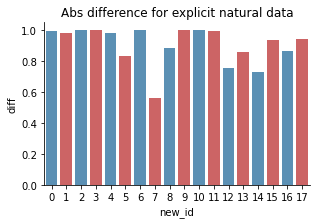

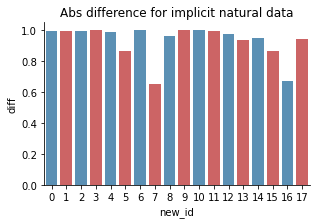

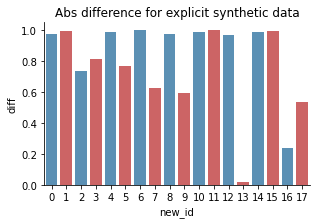

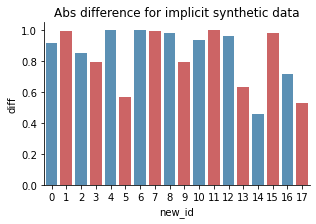

In [5]:
plot_fmp(diff_ex_natural, 'explicit', 'natural')
plot_fmp(diff_im_natural, 'implicit', 'natural')
plot_fmp(diff_ex_synthetic, 'explicit', 'synthetic')
plot_fmp(diff_im_synthetic, 'implicit', 'synthetic')

Non-Absolute Difference and Analysis

In [2]:
# Re-load files
file_natural = pd.read_csv('results/natural/natural_imagebind_afforded.csv')
file_natural = file_natural.drop(columns=['Unnamed: 0'])

file_synthetic = pd.read_csv('results/synthetic/synthetic_imagebind_afforded.csv')
file_synthetic = file_synthetic.drop(columns=['Unnamed: 0'])

In [3]:
# Prelim check of ids
natural_group_ids = set(file_natural['group_id'].unique())
synthetic_group_ids = set(file_synthetic['group_id'].unique())
print(natural_group_ids)
print(synthetic_group_ids)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18}
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18}


In [4]:
# Pivot for non-absolute
def pivot_fmp_non_abs(df, ex_im):
    indexed = df[df['prompt_type'] == ex_im]
    pivoted = indexed.pivot_table(index='group_id', columns='relationships', 
                                  values='probability', aggfunc='mean').reset_index()
    non_abs_diff = pivoted.assign(diff = pivoted['afforded'] - pivoted['non_afforded'],
                                  new_id = np.arange(len(pivoted)))

    return non_abs_diff

In [5]:
def plot_fmp_non_abs(df, ex_im, na_sy):
    plot = sns.catplot(data = df,
                       x = "new_id",
                       y = "diff",
                       kind='bar',
                       height= 3,
                       aspect=1.5,
                       palette= ['C0'],
                       alpha= 0.8).set(title = f'Difference for {ex_im} {na_sy} data')
    return plot

In [6]:
def correlate_differences(natural_explicit, natural_implicit, synthetic_explicit, synthetic_implicit):
    common_groups_nat = set(natural_explicit['group_id']).intersection(set(natural_implicit['group_id']))
    common_groups_syn = set(synthetic_explicit['group_id']).intersection(set(synthetic_implicit['group_id']))

    # Filter dfs
    nat_exp_common = natural_explicit[natural_explicit['group_id'].isin(common_groups_nat)]
    nat_imp_common = natural_implicit[natural_implicit['group_id'].isin(common_groups_nat)]
    syn_exp_common = synthetic_explicit[synthetic_explicit['group_id'].isin(common_groups_syn)]
    syn_imp_common = synthetic_implicit[synthetic_implicit['group_id'].isin(common_groups_syn)]

    # Calculate corr
    corr_nat_exp_vs_imp = nat_exp_common['diff'].corr(nat_imp_common['diff'])
    corr_syn_exp_vs_imp = syn_exp_common['diff'].corr(syn_imp_common['diff'])

    common_groups_explicit = set(natural_explicit['group_id']).intersection(set(synthetic_explicit['group_id']))
    common_groups_implicit = set(natural_implicit['group_id']).intersection(set(synthetic_implicit['group_id']))

    # Filter dfs (explicit and implicit prompts across datasets)
    nat_explicit_common = natural_explicit[natural_explicit['group_id'].isin(common_groups_explicit)]
    syn_explicit_common = synthetic_explicit[synthetic_explicit['group_id'].isin(common_groups_explicit)]
    nat_implicit_common = natural_implicit[natural_implicit['group_id'].isin(common_groups_implicit)]
    syn_implicit_common = synthetic_implicit[synthetic_implicit['group_id'].isin(common_groups_implicit)]

    # Calculate corr (cross dataset)
    corr_explicit_nat_vs_syn = nat_explicit_common['diff'].corr(syn_explicit_common['diff'])
    corr_implicit_nat_vs_syn = nat_implicit_common['diff'].corr(syn_implicit_common['diff'])

    return corr_nat_exp_vs_imp, corr_syn_exp_vs_imp, corr_explicit_nat_vs_syn, corr_implicit_nat_vs_syn

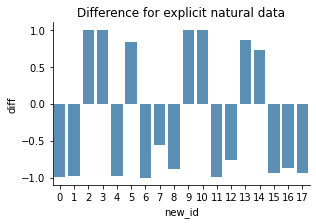

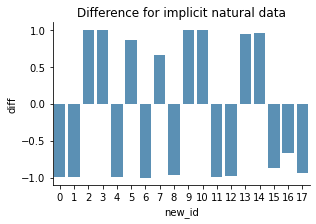

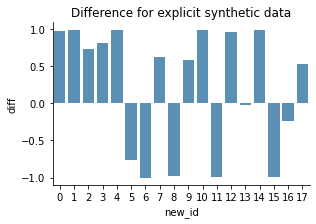

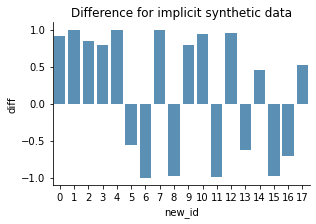

In [7]:
# Calculate non-abs diff
diff_ex_natural_non_abs = pivot_fmp_non_abs(file_natural, 'explicit')
diff_im_natural_non_abs = pivot_fmp_non_abs(file_natural, 'implicit')
diff_ex_synthetic_non_abs = pivot_fmp_non_abs(file_synthetic, 'explicit')
diff_im_synthetic_non_abs = pivot_fmp_non_abs(file_synthetic, 'implicit')

# Plot
plot_fmp_non_abs(diff_ex_natural_non_abs, 'explicit', 'natural')
plot_fmp_non_abs(diff_im_natural_non_abs, 'implicit', 'natural')
plot_fmp_non_abs(diff_ex_synthetic_non_abs, 'explicit', 'synthetic')
plot_fmp_non_abs(diff_im_synthetic_non_abs, 'implicit', 'synthetic')

In [8]:
def analyze_correlations(natural_explicit, natural_implicit, synthetic_explicit, synthetic_implicit):
    # Compute
    corr_nat_exp_vs_imp, corr_syn_exp_vs_imp, corr_explicit_nat_vs_syn, corr_implicit_nat_vs_syn = correlate_differences(
        natural_explicit, natural_implicit, synthetic_explicit, synthetic_implicit
    )

    # Print
    print(f"Correlation between explicit and implicit prompts within natural dataset: {corr_nat_exp_vs_imp}")
    print(f"Correlation between explicit and implicit prompts within synthetic dataset: {corr_syn_exp_vs_imp}")
    print(f"Correlation of explicit prompts between natural and synthetic datasets: {corr_explicit_nat_vs_syn}")
    print(f"Correlation of implicit prompts between natural and synthetic datasets: {corr_implicit_nat_vs_syn}")

analyze_correlations(diff_ex_natural_non_abs, diff_im_natural_non_abs, 
                     diff_ex_synthetic_non_abs, diff_im_synthetic_non_abs)

Correlation between explicit and implicit prompts within natural dataset: 0.9505623670647828
Correlation between explicit and implicit prompts within synthetic dataset: 0.956454950454086
Correlation of explicit prompts between natural and synthetic datasets: 0.27028739069521585
Correlation of implicit prompts between natural and synthetic datasets: 0.2634577764819398


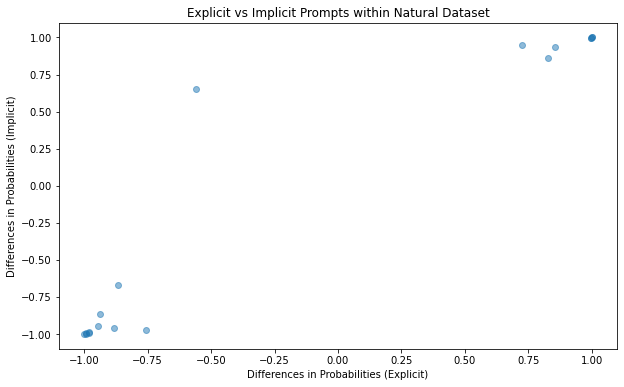

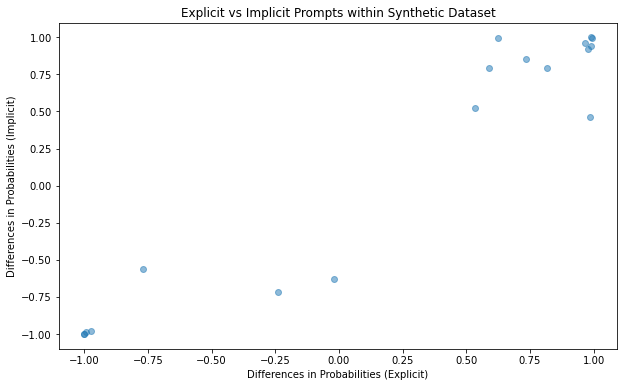

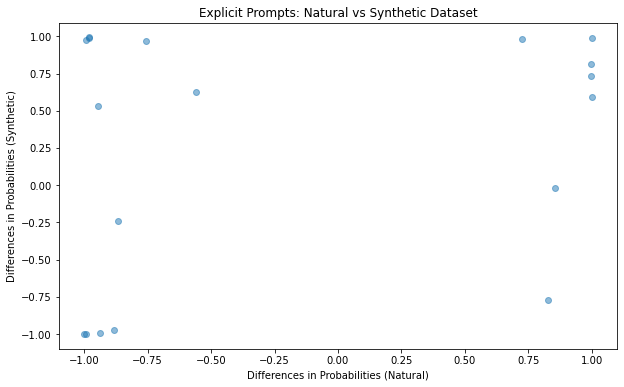

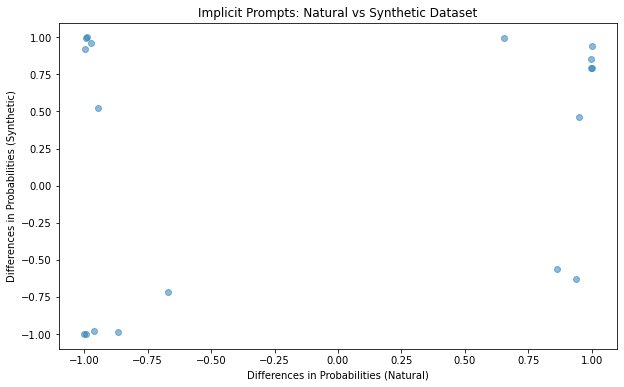

In [10]:
# Explicit vs Implicit within Natural
plt.figure(figsize=(10, 6))
plt.scatter(diff_ex_natural_non_abs['diff'], diff_im_natural_non_abs['diff'], alpha=0.5)
plt.title('Explicit vs Implicit Prompts within Natural Dataset')
plt.xlabel('Differences in Probabilities (Explicit)')
plt.ylabel('Differences in Probabilities (Implicit)')
plt.show()

# Explicit vs Implicit within Synthetic
plt.figure(figsize=(10, 6))
plt.scatter(diff_ex_synthetic_non_abs['diff'], diff_im_synthetic_non_abs['diff'], alpha=0.5)
plt.title('Explicit vs Implicit Prompts within Synthetic Dataset')
plt.xlabel('Differences in Probabilities (Explicit)')
plt.ylabel('Differences in Probabilities (Implicit)')
plt.show()

# Explicit Prompts between Natural and Synthetic
plt.figure(figsize=(10, 6))
plt.scatter(diff_ex_natural_non_abs['diff'], diff_ex_synthetic_non_abs['diff'], alpha=0.5)
plt.title('Explicit Prompts: Natural vs Synthetic Dataset')
plt.xlabel('Differences in Probabilities (Natural)')
plt.ylabel('Differences in Probabilities (Synthetic)')
plt.show()

# Implicit Prompts between Natural and Synthetic
plt.figure(figsize=(10, 6))
plt.scatter(diff_im_natural_non_abs['diff'], diff_im_synthetic_non_abs['diff'], alpha=0.5)
plt.title('Implicit Prompts: Natural vs Synthetic Dataset')
plt.xlabel('Differences in Probabilities (Natural)')
plt.ylabel('Differences in Probabilities (Synthetic)')
plt.show()